In [18]:
%pip install scikit-learn
%pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from colorsys import hsv_to_rgb
from collections import Counter

In [19]:
df = pd.read_csv('dp_with_labels.csv', header=None)

In [20]:
df.shape

(1550, 4097)

In [21]:
pts_ids = df.iloc[:, 0]
pts_features = df.iloc[:, 1:]

step2
A:
Apply K-means on the features:

In [22]:

kmeans = KMeans(n_clusters=4,       
                init='random',      
                n_init=5,           
                max_iter=500,       
                random_state=66)    

In [23]:
kmeans.fit(pts_features)

KMeans(init='random', max_iter=500, n_clusters=4, n_init=5, random_state=66)

In [24]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[0.10525289 0.15588909 0.20627435 ... 0.42438041 0.37922884 0.54605101]
 [0.11978645 0.14916015 0.20089165 ... 0.54253693 0.74856587 0.39753049]
 [0.03412849 0.05824236 0.13609711 ... 0.46629273 0.29945581 0.35747412]
 [0.07771031 0.08709807 0.10163662 ... 0.49301515 0.39726771 0.66448591]]
[3 3 1 ... 0 2 3]


Step2
B:
Standardize the data and apply PCA

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pts_features)
centers = scaler.transform(kmeans.cluster_centers_)
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)
pca_centers = pca.transform(centers)
print(pca_features)

[[-24.79937808  39.57406435  -8.34751185]
 [-26.53984622  41.03494144  -9.10385881]
 [ 38.91883501   0.60057756 -22.73777396]
 ...
 [ 12.99700982  -1.60695609  49.33119253]
 [-27.99155047 -36.82003245 -12.6996995 ]
 [-22.88241665  43.89001623  -9.85092288]]


3D visualization

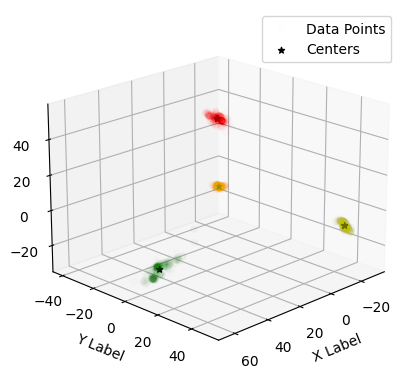

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_features[:, 0]
y = pca_features[:, 1]
z = pca_features[:, 2]

color_map = {0: 'r', 1: 'g', 2: 'orange', 3: 'y'}
colors = [color_map[label] for label in kmeans.labels_]


ax.scatter(x, y, z, c=colors, marker='o', alpha = 0.01, label='Data Points', zorder=1)




ax.scatter(pca_centers[:, 0], pca_centers[:, 1], pca_centers[:, 2], 
           c='black', marker='*', label='Centers', zorder=2)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=20, azim=45)  

plt.legend()
plt.show()

step3: 
Now we do the same process using DBSCAN

In [27]:
dbscan_1 = DBSCAN(eps=2, min_samples=4)
dbscan_2 = DBSCAN(eps=2, min_samples=6)
dbscan_1.fit(pts_features)
dbscan_2.fit(pts_features)

print(dbscan_1.labels_)
print(dbscan_2.labels_)

labels_1 = dbscan_1.labels_
labels_2 = dbscan_2.labels_

[ 0  0  1 ... 23  7  5]
[ 0  0  1 ... 17  7  5]


31


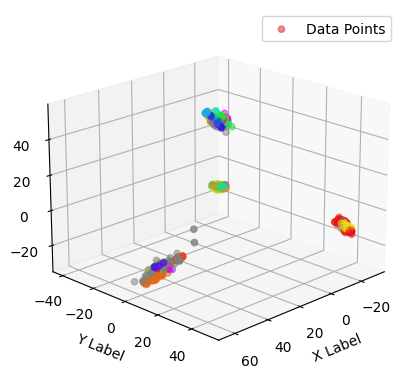

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_features[:, 0]
y = pca_features[:, 1]
z = pca_features[:, 2]

n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)

print(n_clusters_1 )


hues_1 = np.linspace(0, 1, n_clusters_1, endpoint=False)  
saturation = 0.9  
value = 0.9       


cluster_1_colors = [
    hsv_to_rgb(hue, saturation, value)
    for hue in hues_1
]


colors_1 = [
    cluster_1_colors[label] if label != -1 else (0.5, 0.5, 0.5)
    for label in labels_1
]


ax.scatter(x, y, z, c=colors_1, marker='o', alpha = 0.5, label='Data Points')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=20, azim=45)  

plt.legend()
plt.show()

22


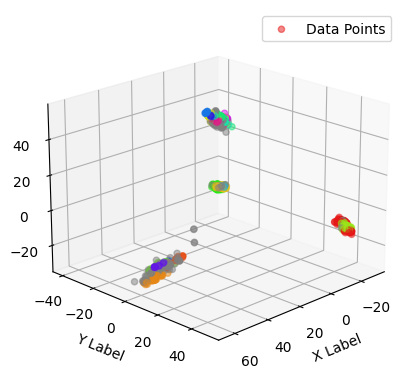

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_features[:, 0]
y = pca_features[:, 1]
z = pca_features[:, 2]

n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)

print(n_clusters_2)

hues_2 = np.linspace(0, 1, n_clusters_2, endpoint=False)  
saturation = 0.9  
value = 0.9       


cluster_2_colors = [
    hsv_to_rgb(hue, saturation, value)
    for hue in hues_2
]


colors_2 = [
    cluster_2_colors[label] if label != -1 else (0.5, 0.5, 0.5)
    for label in labels_2
]


ax.scatter(x, y, z, c=colors_2, marker='o', alpha = 0.5, label='Data Points')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=20, azim=45)  

plt.legend()
plt.show()

For step 4

In [30]:
k_mean_counts = Counter(kmeans.labels_)
print(k_mean_counts)
dbscan_1_counts = Counter(dbscan_1.labels_)
print(dbscan_1_counts)
dbscan_2_counts = Counter(dbscan_2.labels_)
print(dbscan_2_counts)

Counter({2: 425, 3: 400, 0: 375, 1: 350})
Counter({7: 294, 0: 204, 5: 192, 4: 135, 3: 117, 6: 117, 2: 100, -1: 99, 11: 65, 8: 43, 20: 25, 1: 23, 17: 14, 12: 13, 14: 11, 19: 10, 22: 9, 16: 8, 23: 8, 26: 7, 10: 6, 18: 6, 25: 6, 9: 5, 15: 5, 24: 4, 13: 4, 21: 4, 27: 4, 28: 4, 29: 4, 30: 4})
Counter({7: 294, 0: 204, 5: 192, -1: 139, 4: 134, 3: 117, 6: 117, 2: 100, 9: 65, 8: 43, 15: 25, 1: 23, 13: 14, 10: 13, 11: 11, 20: 10, 16: 9, 12: 8, 17: 8, 19: 6, 14: 6, 18: 6, 21: 6})


output a csv

In [32]:
# Convert counters to DataFrames

df1 = pd.DataFrame(list(kmeans.labels_))
df2 = pd.DataFrame(list(dbscan_1.labels_))
df3 = pd.DataFrame(list(dbscan_2.labels_))
# Reorder columns to place 'ID' first
combined_df = pd.concat([pts_ids, df1, df3], axis=1)
column_names = ['ID', 'Kmeans_labels', 'DBSCAN_2_labels']
combined_df.columns = column_names

print(combined_df)

          ID  Kmeans_labels  DBSCAN_2_labels
0     DP0001              3                0
1     DP0002              3                0
2     DP0003              1                1
3     DP0004              1                2
4     DP0005              1                2
...      ...            ...              ...
1545  DP1546              1               -1
1546  DP1547              0                4
1547  DP1548              0               17
1548  DP1549              2                7
1549  DP1550              3                5

[1550 rows x 3 columns]


In [33]:
combined_df.to_csv('points_with_labels.csv', index=False)